In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
sns.set(style="whitegrid")

In [3]:
df = pd.read_csv(r'C:\Users\PRM\Documents\Projects\Python\COVID\time_series_covid19_confirmed_US.csv')
#source: https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv
#https://www.kaggle.com/anshuls235/covid19-explained-through-visualizations

In [4]:
df.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,11/19/21,11/20/21,11/21/21,11/22/21,11/23/21,11/24/21,11/25/21,11/26/21,11/27/21,11/28/21
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,10457,10468,10471,10477,10495,10508,10512,10512,10517,10517
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,37959,37981,37986,38000,38014,38042,38061,38061,38068,38074
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,3660,3683,3687,3688,3690,3691,3691,3691,3694,3694
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,4333,4337,4337,4337,4338,4339,4340,4340,4340,4340
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,10621,10626,10636,10640,10659,10696,10700,10700,10714,10715


# Cleaning

In [5]:
df = df.melt(id_vars=['UID',
                 'iso2',
                 'iso3',
                 'code3',
                 'FIPS',
                 'Admin2',
                 'Province_State',
                 'Country_Region',
                 'Lat',
                 'Long_',
                 'Combined_Key'], 
        var_name="Date", 
        value_name="Confirmed Cases")

In [6]:
df.shape

(2262534, 13)

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df_st = df.groupby(['Province_State','Date'],as_index=False).sum('Confirmed Cases')[['Province_State','Date','Confirmed Cases']]
df_st.head()

,Province_State,Date,Confirmed Cases
0,Alabama,2020-01-22,0
1,Alabama,2020-01-23,0
2,Alabama,2020-01-24,0
3,Alabama,2020-01-25,0
4,Alabama,2020-01-26,0


In [9]:
df_st = df_st.sort_values(by=['Province_State', 'Date'])
df_st['Confirmed Cases']=df_st['Confirmed Cases'].astype('int')
#df_st['Date']=df_st['Date'].astype('object')
df_st['new_cases']=df_st.groupby(['Province_State'])[['Confirmed Cases']].diff().fillna(0)
df_st['Confirmed_Cases_log']= np.log(df_st['Confirmed Cases']+1)
df_st.head()

,Province_State,Date,Confirmed Cases,new_cases,Confirmed_Cases_log
0,Alabama,2020-01-22,0,0.0,0.0
1,Alabama,2020-01-23,0,0.0,0.0
2,Alabama,2020-01-24,0,0.0,0.0
3,Alabama,2020-01-25,0,0.0,0.0
4,Alabama,2020-01-26,0,0.0,0.0


# Exploratory Data Analysis

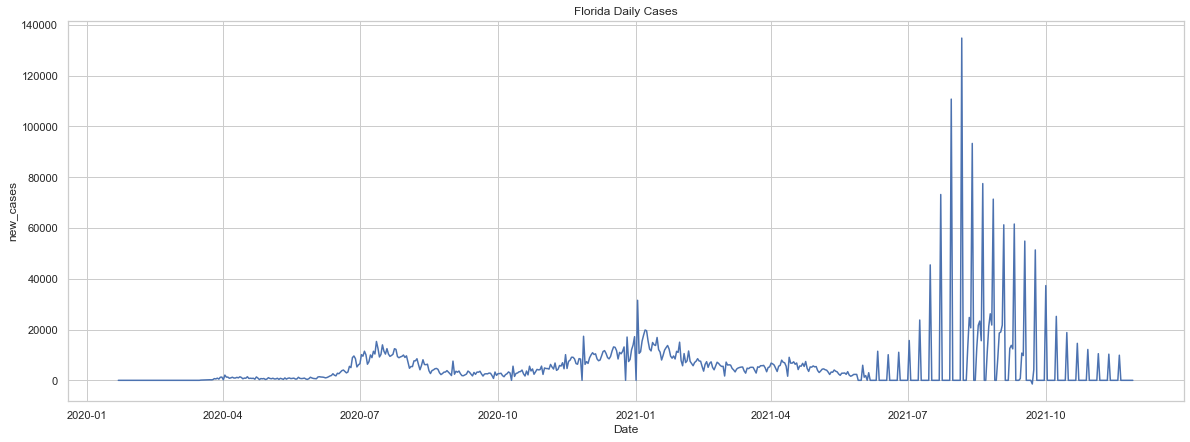

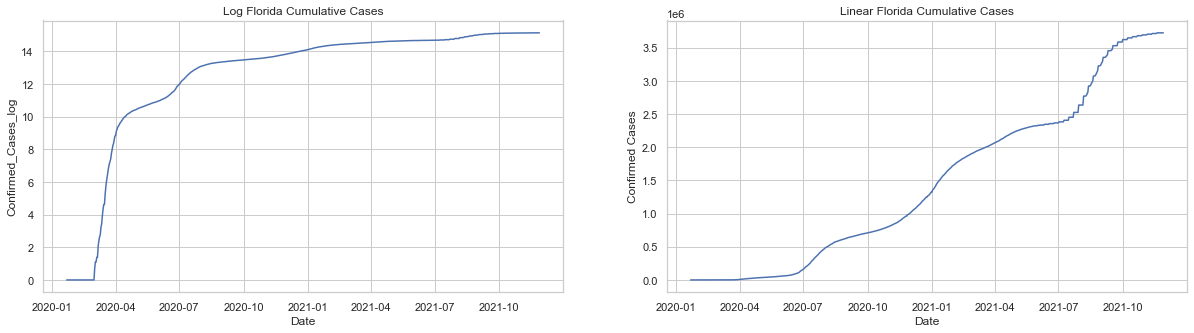

In [14]:
x = 'Florida'
y = '9-30-2019'


z=df_st[(df_st['Province_State']==x) & (df_st['Date']>y)]

plt.figure(figsize=(20,7))
ax = sns.lineplot(x='Date', y= "new_cases",data= z )
ax.set_title(x + ' Daily Cases')


fig, axs = plt.subplots(ncols=2,figsize=(20.5,5))

ax = sns.lineplot(x='Date', y= "Confirmed_Cases_log",data= df_st[df_st['Province_State']==x],ax=axs[0])
ax.set_title('Log '+ x + ' Cumulative Cases')
#ax.set(xscale='log')

bx= sns.lineplot(x='Date', y= "Confirmed Cases",data= z,ax=axs[1])
bx.set_title('Linear '+ x + ' Cumulative Cases')
#bx.set(xscale='linear')


plt.show()

#https://www.weforum.org/agenda/2020/04/covid-19-spread-logarithmic-graph/

In [13]:
df_st[(df_st['Date']=='2021-11-28')].sort_values(by='Confirmed_Cases_log',ascending=False).head(10)

,Province_State,Date,Confirmed Cases,new_cases,Confirmed_Cases_log
4061,California,2021-11-28,5061240,1958.0,15.437122
33849,Texas,2021-11-28,4321134,0.0,15.279029
8123,Florida,2021-11-28,3721503,0.0,15.129638
25048,New York,2021-11-28,2715335,4828.0,14.814426
12185,Illinois,2021-11-28,1784900,0.0,14.394874
29787,Pennsylvania,2021-11-28,1725902,4159.0,14.361261
27756,Ohio,2021-11-28,1677741,4245.0,14.332959
8800,Georgia,2021-11-28,1659491,0.0,14.322022
25725,North Carolina,2021-11-28,1524078,0.0,14.236901
18278,Michigan,2021-11-28,1447230,0.0,14.185163


# Notes

Ideas


Map Plot
7/14/21,28 day avg
forecasting